<a href="https://colab.research.google.com/github/JapiKredi/Pinnacle_AI_program_AnalyticsVidyha/blob/main/Ridge_and_Lasso_Implementation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Defining independent variable as angles from 10deg to 360deg converted to radians
x = np.array([i*np.pi/180 for i in range(10,360,3)])

In [3]:
#Setting seed for reproducability
np.random.seed(10)

In [4]:
#Defining the target/dependent variable as sine of the independent variable
y = np.sin(x) + np.random.normal(0,0.15,len(x))

In [5]:
#Creating the dataframe using independent and dependent variable
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

In [6]:
#Printing first 5 rows of the data
data.head()

,x,y
0,0.174533,0.373386
1,0.226893,0.332243
2,0.279253,0.043827
3,0.331613,0.324311
4,0.383972,0.467807


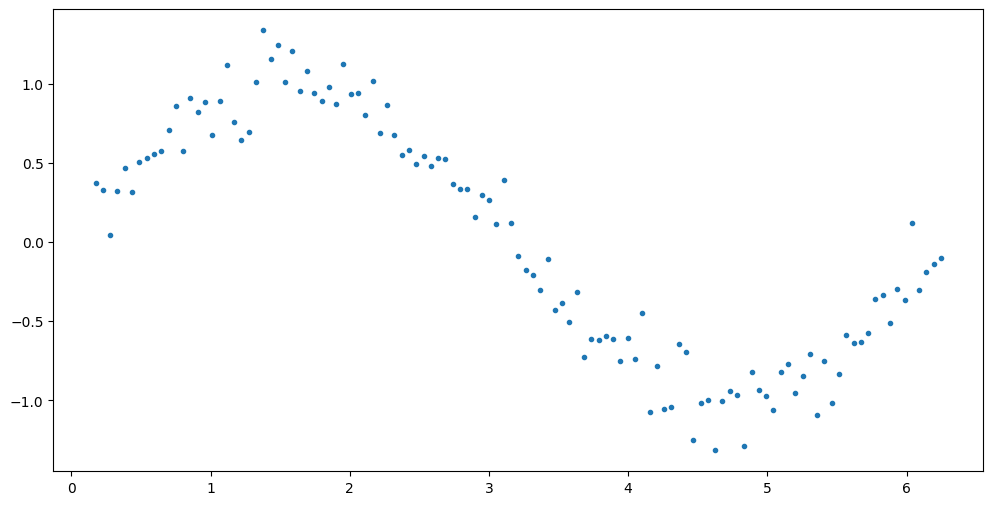

In [7]:
#Plotting the dependent and independent variables
plt.figure(figsize=(12,6))
plt.plot(data['x'],data['y'],'.')

In [8]:
# polynomial regression with powers of x from 1 to 15
for i in range(2,19):  #power of 1 is already there, hence starting with 2
    colname = f'x_{i}'      #new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18
0,0.174533,0.373386,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09,7.989662e-10,1.394459e-10,2.433790e-11,4.247765e-12,7.413749e-13,1.293943e-13,2.258357e-14
1,0.226893,0.332243,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10,4.933232e-11,1.119315e-11,2.539645e-12
2,0.279253,0.043827,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09,1.367595e-09,3.819047e-10,1.066479e-10
3,0.331613,0.324311,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,1.462338e-04,4.849296e-05,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08,2.138432e-08,7.091310e-09,2.351567e-09
4,0.383972,0.467807,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,4.724984e-04,1.814264e-04,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07,2.232548e-07,8.572368e-08,3.291553e-08


### Creating test and train Set Randomly

In [9]:
data['randNumCol'] = np.random.randint(1, 6, data.shape[0])
train = data[data['randNumCol']<=3]
test = data[data['randNumCol']>3]
train = train.drop('randNumCol', axis=1)
test = test.drop('randNumCol', axis=1)

## Linear Regression

In [10]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
#Separating the independent and dependent variables
X_train = train.drop('y', axis=1).values
y_train = train['y'].values
X_test = test.drop('y', axis=1).values
y_test = test['y'].values

Training Error = 0.213144309581739
Testing Error = 0.18974033118165393


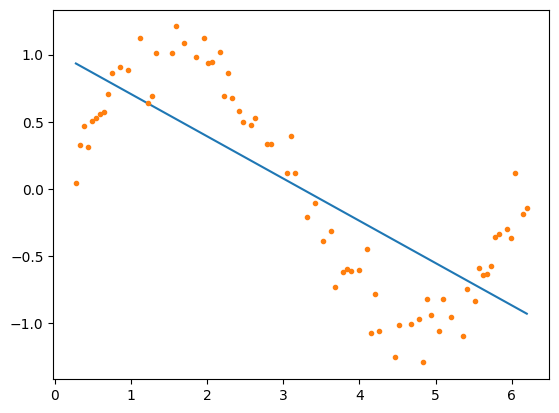

In [12]:
#Linear regression with one features
independent_variable_train = X_train[:,0:1]

linreg = LinearRegression()
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

print("Training Error =", mean_squared_error(y_train, y_train_pred))

independent_variable_test = X_test[:,0:1]
y_test_pred = linreg.predict(independent_variable_test)

print("Testing Error =", mean_squared_error(y_test, y_test_pred))

plt.plot(X_train[:,0:1],y_train_pred)
plt.plot(X_train[:,0:1],y_train,'.')
plt.show()

Training Error = 0.021472481770965682
Testing Error = 0.030451878881971598


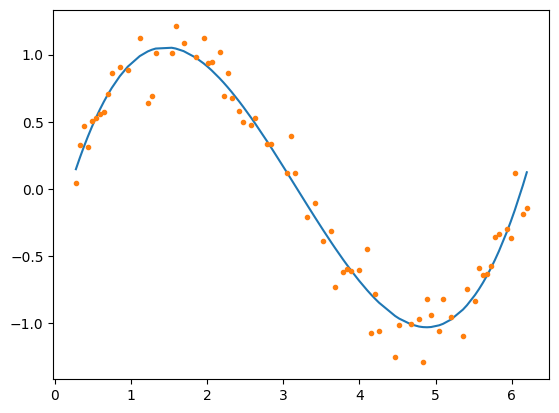

In [13]:
#Linear regression with three features
independent_variable_train = X_train[:,0:3]

linreg = LinearRegression()
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

print("Training Error =", mean_squared_error(y_train, y_train_pred))

independent_variable_test = X_test[:,0:3]
y_test_pred = linreg.predict(independent_variable_test)

print("Testing Error =", mean_squared_error(y_test, y_test_pred))

plt.plot(X_train[:,0:1],y_train_pred)
plt.plot(X_train[:,0:1],y_train,'.')
plt.show()

Training Error = 0.018764347745716146
Testing Error = 0.03217644503769279


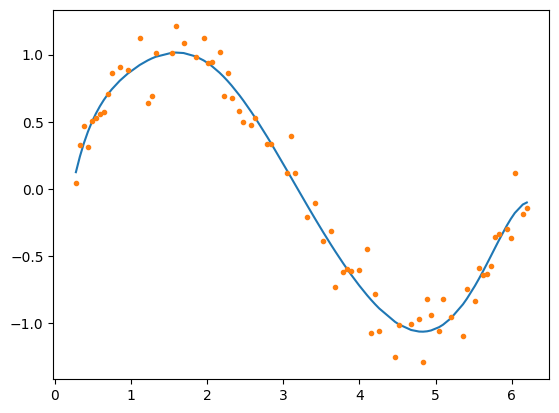

In [14]:
#Linear regression with nine features
independent_variable_train = X_train[:,0:9]

linreg = LinearRegression()
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

print("Training Error =", mean_squared_error(y_train, y_train_pred))

independent_variable_test = X_test[:,0:9]
y_test_pred = linreg.predict(independent_variable_test)

print("Testing Error =", mean_squared_error(y_test, y_test_pred))

plt.plot(X_train[:,0:1],y_train_pred)
plt.plot(X_train[:,0:1],y_train,'.')
plt.show()

In [15]:
#Initialize a dataframe to store the results:
col = ['mse_train','mse_test','intercept'] + [f'coef_Var_{i}' for i in range(1,19)]
ind = [f'Number_of_variables_{i}' for i in range(1,19)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

In [16]:
def linear_regression(train_x, train_y):

    #Fit the model and predict
    linreg = LinearRegression()
    linreg.fit(train_x,train_y)
    train_y_pred = linreg.predict(train_x)
    test_y_pred = linreg.predict(test_x)


    #add the result in pre-defined format to the dataframe
    mse_train = mean_squared_error(train_y, train_y_pred)
    ret = [mse_train]

    mse_test = mean_squared_error(test_y, test_y_pred)
    ret.extend([mse_test])

    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)

    return ret, train_y_pred, test_y_pred

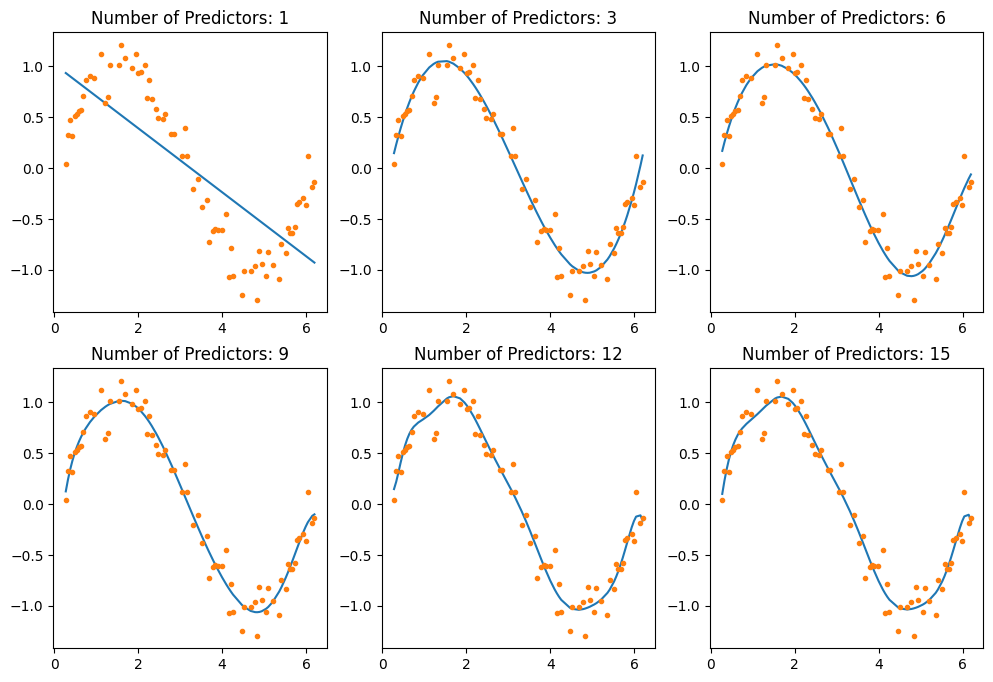

In [17]:
plt.figure(figsize=(12,8))
# For how many number of features we want to plot
features_to_plot = [1, 3, 6, 9, 12, 15]

for i in range(1,19):
    # select data with i number of features
    train_x = X_train[:,0:i]
    train_y = y_train
    test_x = X_test[:,0:i]
    test_y = y_test

    ret, train_y_pred, test_y_pred = linear_regression(train_x, train_y)

    coef_matrix_simple.iloc[i-1, 0:i+3] = ret

    #Check if a plot is to be made for the entered features
    if i in features_to_plot:
        subplot_position = features_to_plot.index(i)+1
        plt.subplot(2,3,subplot_position)
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,'.')
        plt.title(f'Number of Predictors: {i}')

In [18]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,mse_train,mse_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,...,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15,coef_Var_16,coef_Var_17,coef_Var_18
Number_of_variables_1,0.21,0.19,1,-0.31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variables_2,0.21,0.19,1.1,-0.39,0.012,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variables_3,0.021,0.03,-0.4,2.2,-0.99,0.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variables_4,0.021,0.03,-0.43,2.3,-1,0.12,-0.001,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variables_5,0.02,0.023,-0.096,1.2,0.0084,-0.29,0.069,-0.0043,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variables_6,0.019,0.028,-0.4,2.5,-1.6,0.66,-0.2,0.031,-0.0018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variables_7,0.019,0.028,-0.38,2.4,-1.5,0.53,-0.15,0.021,-0.00067,-5.1e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variables_8,0.019,0.032,-0.85,5.1,-7,6,-3.1,0.92,-0.16,0.015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variables_9,0.019,0.032,-0.94,5.7,-8.5,7.7,-4.3,1.4,-0.28,0.033,...,5e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variables_10,0.018,0.044,-2.4,16,-38,50,-39,19,-6,1.2,...,0.011,-0.00033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


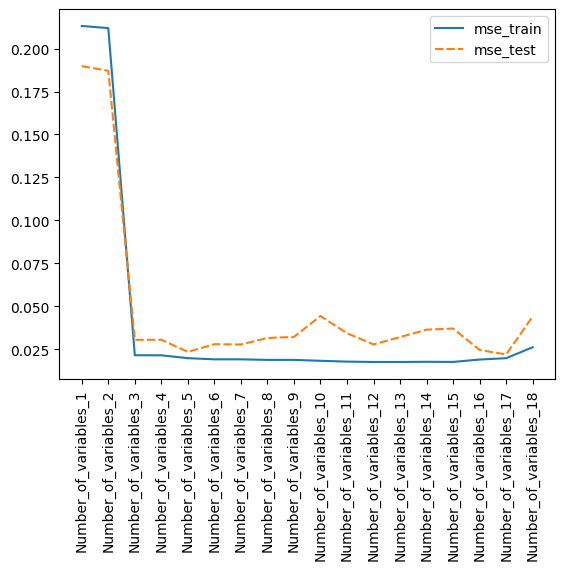

In [19]:
sns.lineplot(coef_matrix_simple[['mse_train','mse_test']])
plt.xticks(rotation=90)
plt.show()

## Ridge

In [20]:
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [22]:
#Set the different values of alpha to be tested
alpha_ridge = [0, 1e-12, 1e-9, 1e-6, 1e-3, 1e-1, 1, 5, 10, 20]

'normalize' parameter for Ridge is removed in version 1.2 of sklearn.

In [23]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [24]:
#Initialize a dataframe to store the results:
col = ['mse_train','mse_test','intercept'] + [f'coef_Var_{i}' for i in range(1,19)]
ind = [f'alpha {i}' for i in alpha_ridge]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

In [25]:
def ridge_regression(train_x, train_y, alpha):

    #Fit the model and predict
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_x,train_y)
    train_y_pred = ridge.predict(train_x)
    test_y_pred = ridge.predict(test_x)


    #add the result in pre-defined format to the dataframe
    mse_train = mean_squared_error(train_y, train_y_pred)
    ret = [mse_train]

    mse_test = mean_squared_error(test_y, test_y_pred)
    ret.extend([mse_test])
    ret.extend([ridge.intercept_])
    ret.extend(ridge.coef_)

    return ret, train_y_pred, test_y_pred

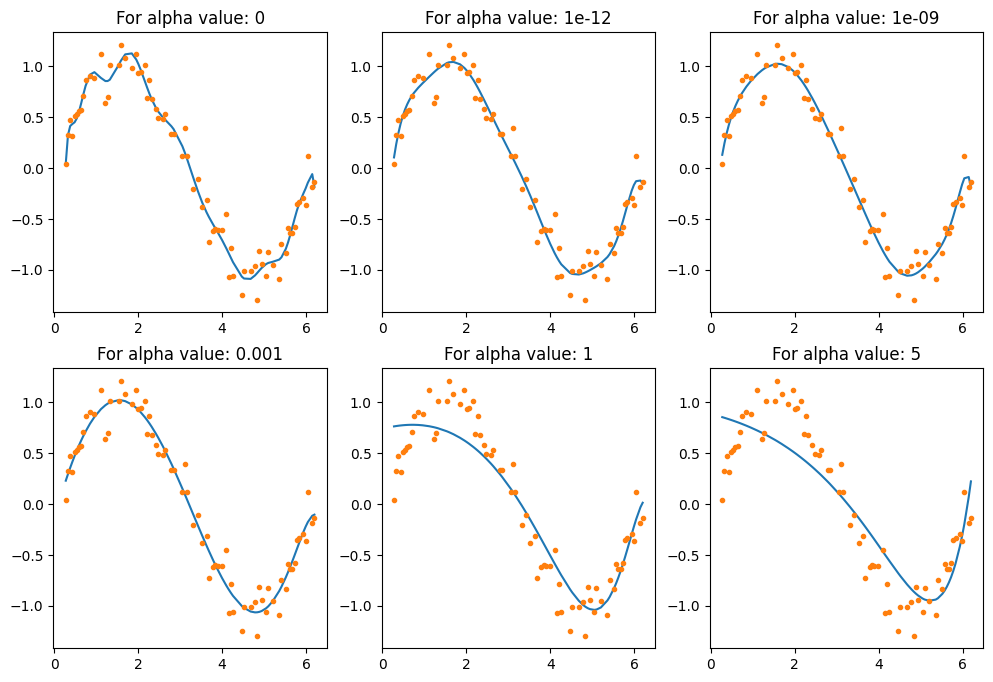

In [26]:
plt.figure(figsize=(12,8))
# For which alpha values we want to plot
alpha_to_plot = [0, 1e-12, 1e-9, 1e-3, 1, 5]

for i in range(10):
    ret, train_y_pred, test_y_pred = ridge_regression(X_train, y_train, alpha=alpha_ridge[i])

    coef_matrix_ridge.iloc[i,] = ret

    #Check if a plot is to be made for the entered features
    if alpha_ridge[i] in alpha_to_plot:
        subplot_position = alpha_to_plot.index(alpha_ridge[i])+1
        plt.subplot(2,3,subplot_position)
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,'.')
        plt.title(f'For alpha value: {alpha_ridge[i]}')

In [27]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,mse_train,mse_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,...,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15,coef_Var_16,coef_Var_17,coef_Var_18
alpha 0,0.015,1.4e+41,-0.003,3.3e+02,-8.4e+03,9.4e+04,-4.3e+05,-1.5e+06,3.5e+07,-2.4e+08,...,-3e+09,6.2e+09,-9.2e+09,9.9e+09,-7.3e+09,3.3e+09,-5.2e+08,-2.8e+08,1.7e+08,-3e+07
alpha 1e-12,0.018,6.8e+33,-0.003,10,-68,-32,2.4e+03,-1.2e+04,2.4e+04,-1.7e+04,...,1.5e+04,1.2e+04,-7.4e+03,-1.3e+04,-4.5e+02,9.1e+03,6.2e+03,-4.9e+03,-4.9e+03,3e+03
alpha 1e-09,0.018,1.5e+30,-0.003,9.9,-94,4.7e+02,-1.3e+03,1.4e+03,31,-1.1e+03,...,7.2e+02,6.9e+02,-57,-6.1e+02,-4.9e+02,84,4.9e+02,2.6e+02,-3.3e+02,14
alpha 1e-06,0.019,6.7e+29,-0.003,4,-14,17,-9.5,-5.3,0.034,4.8,...,7.9,0.75,-8.7,-14,-12,-1.8,12,21,13,-24
alpha 0.001,0.019,1.6e+27,-0.003,2.8,-5.9,-1.1,1.7,2.1,1.4,0.4,...,-0.75,-0.79,-0.56,-0.16,0.26,0.58,0.7,0.52,-0.037,-1
alpha 0.1,0.03,2.1e+25,-0.003,1.2,-2,-1.4,-0.35,0.35,0.66,0.71,...,0.44,0.26,0.098,-0.029,-0.12,-0.17,-0.19,-0.18,-0.14,-0.088
alpha 1,0.062,1.3e+26,-0.003,0.2,-0.77,-0.68,-0.36,-0.069,0.13,0.25,...,0.31,0.29,0.24,0.18,0.11,0.035,-0.04,-0.11,-0.19,-0.26
alpha 5,0.1,6.4e+24,-0.003,-0.19,-0.39,-0.32,-0.18,-0.065,0.022,0.079,...,0.13,0.13,0.12,0.098,0.077,0.052,0.025,-0.0027,-0.031,-0.06
alpha 10,0.11,4.1e+20,-0.003,-0.24,-0.31,-0.24,-0.15,-0.065,-0.0046,0.036,...,0.076,0.081,0.08,0.074,0.065,0.053,0.04,0.026,0.012,-0.0033
alpha 20,0.13,2.1e+24,-0.003,-0.24,-0.25,-0.19,-0.12,-0.066,-0.023,0.0082,...,0.043,0.051,0.055,0.056,0.054,0.051,0.047,0.042,0.036,0.03


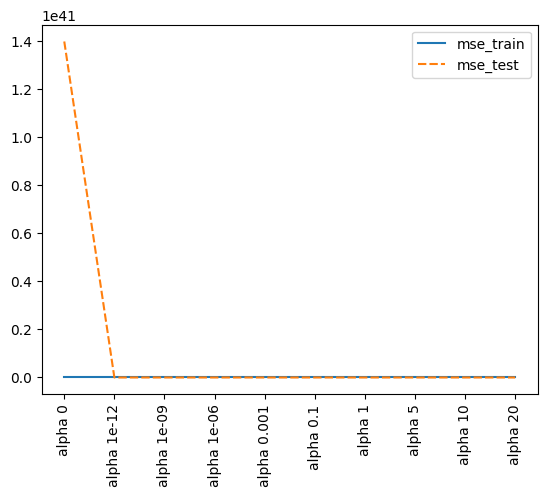

In [28]:
sns.lineplot(coef_matrix_ridge[['mse_train','mse_test']])
plt.xticks(rotation=90)
plt.show()

In [29]:
alpha_ridge

[0, 1e-12, 1e-09, 1e-06, 0.001, 0.1, 1, 5, 10, 20]

In [30]:
#Printing number of zeros in each row of the coefficients dataset
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

,0
alpha 0,0
alpha 1e-12,0
alpha 1e-09,0
alpha 1e-06,0
alpha 0.001,0
alpha 0.1,0
alpha 1,0
alpha 5,0
alpha 10,0
alpha 20,0


## Lasso

In [31]:
#Importing Lasso model from sklearn's linear_model module
from sklearn.linear_model import Lasso

In [32]:
#Set the different values of alpha to be tested
alpha_lasso = [0, 1e-12, 1e-9, 1e-6, 1e-3, 1e-1, 1, 5, 10, 20]

'normalize' parameter for Lasso is removed in version 1.2 of sklearn.
So, we are applyting Standard scaling to the features before fitting the Lasso model.

In [33]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [34]:
#Initialize a dataframe to store the results:
col = ['mse_train','mse_test','intercept'] + [f'coef_Var_{i}' for i in range(1,19)]
ind = [f'alpha {i}' for i in alpha_lasso]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

In [35]:
def lasso_regression(train_x, train_y, alpha):

    #Fit the model and predict
    lasso = Lasso(alpha=alpha, max_iter=2000)
    lasso.fit(train_x,train_y)

    train_y_pred = lasso.predict(train_x)
    test_y_pred = lasso.predict(test_x)


    #add the result in pre-defined format to the dataframe
    mse_train = mean_squared_error(train_y, train_y_pred)
    ret = [mse_train]

    mse_test = mean_squared_error(test_y, test_y_pred)
    ret.extend([mse_test])
    ret.extend([lasso.intercept_])
    ret.extend(lasso.coef_)

    return ret, train_y_pred, test_y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.144e-01, tolerance: 3.983e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

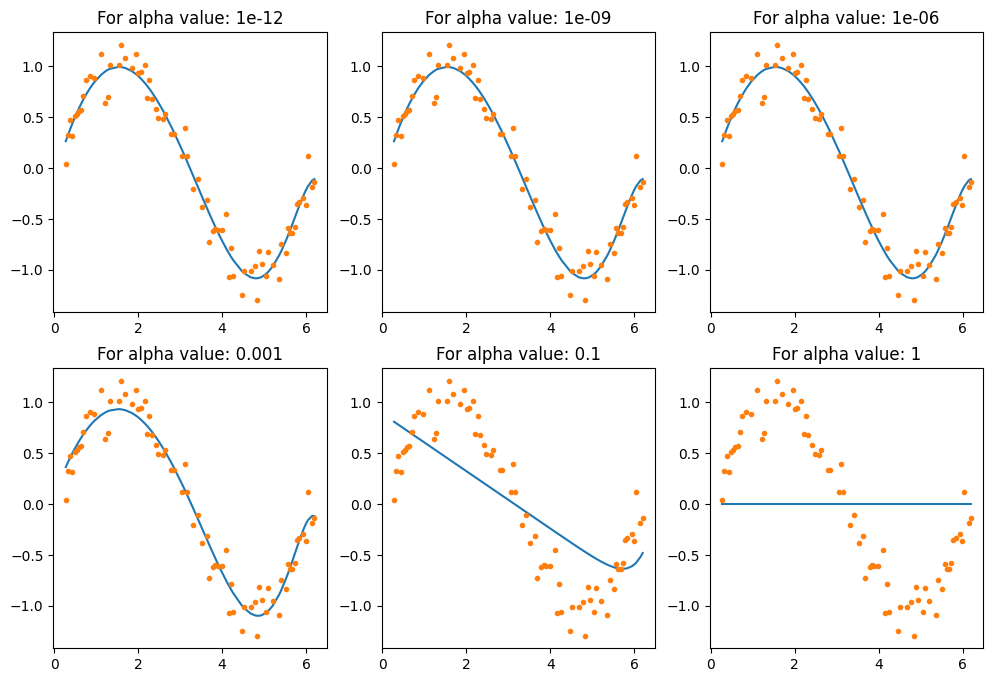

In [36]:
plt.figure(figsize=(12,8))
# For which alpha values we want to plot
alpha_to_plot = [1e-12, 1e-9, 1e-6, 1e-3, 1e-1, 1]

for i in range(10):
    ret, train_y_pred, test_y_pred = lasso_regression(X_train, y_train, alpha=alpha_lasso[i])

    coef_matrix_lasso.iloc[i,] = ret

    #Check if a plot is to be made for the entered features
    if alpha_lasso[i] in alpha_to_plot:
        subplot_position = alpha_to_plot.index(alpha_lasso[i])+1
        plt.subplot(2,3,subplot_position)
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,'.')
        plt.title(f'For alpha value: {alpha_lasso[i]}')

In [37]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,mse_train,mse_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,...,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15,coef_Var_16,coef_Var_17,coef_Var_18
alpha 0,0.02,2.4e+24,-0.003,2.7,-6,0.1,1.3,1.1,0.66,0.33,...,-0.0036,-0.063,-0.085,-0.087,-0.078,-0.066,-0.053,-0.043,-0.036,-0.032
alpha 1e-12,0.02,2.4e+24,-0.003,2.7,-6,0.1,1.3,1.1,0.66,0.33,...,-0.0036,-0.063,-0.085,-0.087,-0.078,-0.066,-0.053,-0.043,-0.036,-0.032
alpha 1e-09,0.02,2.4e+24,-0.003,2.7,-6,0.1,1.3,1.1,0.66,0.33,...,-0.0036,-0.063,-0.085,-0.087,-0.078,-0.066,-0.053,-0.043,-0.036,-0.032
alpha 1e-06,0.02,2.4e+24,-0.003,2.7,-6,0.1,1.3,1.1,0.66,0.33,...,-0.004,-0.062,-0.085,-0.086,-0.078,-0.066,-0.054,-0.043,-0.036,-0.032
alpha 0.001,0.022,1.8e+26,-0.003,2.1,-4.6,-0,0,0.97,1.1,0.41,...,0,0,0,-0,-0,-0,-0,-0,-0.002,-0.34
alpha 0.1,0.2,8e+24,-0.003,-0.52,-0,-0,-0,-0,0,0,...,0,0,0,0,0,0,0,0,0,0.072
alpha 1,0.55,0.56,-0.003,-0,-0,-0,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha 5,0.55,0.56,-0.003,-0,-0,-0,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha 10,0.55,0.56,-0.003,-0,-0,-0,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha 20,0.55,0.56,-0.003,-0,-0,-0,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


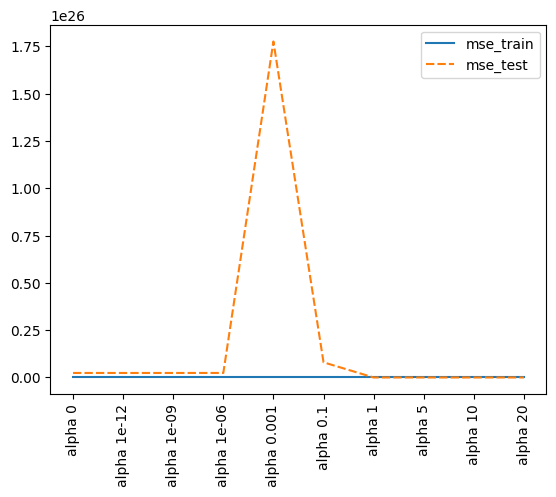

In [38]:
sns.lineplot(coef_matrix_lasso[['mse_train','mse_test']])
plt.xticks(rotation=90)
plt.show()

In [39]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

,0
alpha 0,0
alpha 1e-12,0
alpha 1e-09,0
alpha 1e-06,0
alpha 0.001,11
alpha 0.1,16
alpha 1,18
alpha 5,18
alpha 10,18
alpha 20,18
